In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 15,6
from tqdm import tqdm
import seaborn as sns

In [2]:
data = pd.read_csv('data/train.csv')

In [3]:
train = data.copy(deep=True)

In [4]:
train

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1
5,769060024464,Y,Browning-Hart,4.375,150000,360,2012-02-01,04/2012,80,1.0,...,0,0,0,0,0,0,0,0,0,1
6,148071614687,X,OTHER,4.000,59000,360,2012-02-01,04/2012,95,1.0,...,0,0,0,0,0,0,0,0,0,1
7,853383953266,Y,Browning-Hart,4.500,319000,300,2012-01-01,03/2012,62,1.0,...,0,0,0,0,0,0,0,0,0,1
8,423590072335,X,Browning-Hart,4.000,520000,360,2012-03-01,05/2012,76,1.0,...,0,1,0,1,0,1,2,0,1,1
9,308990846816,X,OTHER,4.000,214000,360,2012-01-01,03/2012,95,2.0,...,0,0,1,1,1,1,1,2,2,1


In [5]:
train.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

| Variable | Description|
| --- | --- |
|loan_id	| Unique loan ID|
|source	|Loan origination channel|
|financial_institution|	Name of the bank|
|interest_rate	|Loan interest rate|
|unpaid_principal_bal|	Loan unpaid principal balance|
|loan_term|	Loan term (in days)|
|origination_date|	Loan origination date|
|first_payment_date|	First instalment payment date|
|loan_to_value	|Loan to value ratio|
|number_of_borrowers|	Number of borrowers|
|debt_to_income_ratio|	Debt-to-income ratio|
|borrower_credit_score|	Borrower credit score|
|loan_purpose	|Loan purpose|
|insurance_percent|	Loan Amount percent covered by insurance|
|co-borrower_credit_score|	Co-borrower credit score|
|insurance_type	|0 - Premium paid by borrower, 1 - Premium paid by Lender|
|m1 to m12	|Month-wise loan performance (deliquency in months)|
|m13	|target, loan deliquency status (0 = non deliquent, 1 = deliquent)|

In [5]:
train.origination_date = pd.to_datetime(train.origination_date)

In [6]:
train.first_payment_date = pd.to_datetime(train.first_payment_date)

In [7]:
train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,2012-05-01,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,2012-03-01,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,2012-03-01,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,2012-04-01,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,2012-04-01,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [9]:
train.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494155e+11,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597560e+11,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000009e+11,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.743034e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,...,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [10]:
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [11]:
draw_missing_data_table(train)

,Total,Percent
m13,0,0.0
insurance_percent,0,0.0
source,0,0.0
financial_institution,0,0.0
interest_rate,0,0.0
unpaid_principal_bal,0,0.0
loan_term,0,0.0
origination_date,0,0.0
first_payment_date,0,0.0
loan_to_value,0,0.0


There are no missing values in the dataset so we can proceed with data analysis methods

## Lable encoding financial_inst,source

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le_financial=LabelEncoder()
le_source = LabelEncoder()
le_loanpurpose = LabelEncoder()

In [10]:
train[train.financial_institution=='Thornton-Davis'][['financial_institution','interest_rate']]

,financial_institution,interest_rate
2,Thornton-Davis,3.250
437,Thornton-Davis,3.375
512,Thornton-Davis,3.750
686,Thornton-Davis,3.250
1000,Thornton-Davis,3.500
1403,Thornton-Davis,3.500
1447,Thornton-Davis,3.500
1455,Thornton-Davis,3.250
1620,Thornton-Davis,3.875
1806,Thornton-Davis,3.000


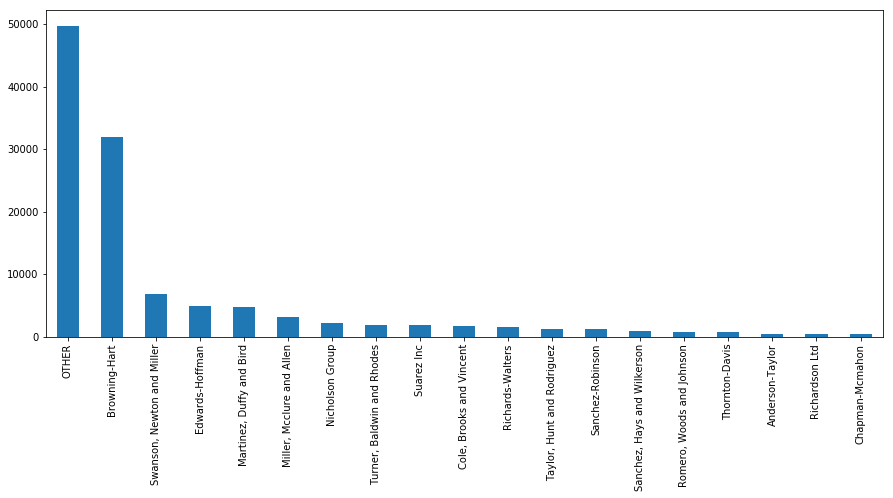

In [17]:
train.financial_institution.value_counts().plot.bar()

> We can see here that majority has been covered by 'OTHER' category which by looking into data are another set of financial institutions that are taken into account

In [11]:
train[train.financial_institution=='OTHER'].interest_rate.value_counts()

3.875    9373
4.000    6229
3.250    4085
3.750    3994
4.125    3326
3.375    3141
4.250    2867
4.375    2321
3.500    2059
3.125    2037
3.000    1865
4.500    1583
3.625    1543
3.990     972
2.875     825
4.625     706
4.750     521
4.875     437
2.750     179
5.000     174
3.950     124
3.100     123
3.850     117
5.125      70
3.900      60
3.999      56
2.990      53
5.250      52
3.800      47
2.950      43
         ... 
3.035       1
4.040       1
3.635       1
3.920       1
3.825       1
2.725       1
4.185       1
3.367       1
4.303       1
2.250       1
3.545       1
3.313       1
6.750       1
4.334       1
3.475       1
3.067       1
3.420       1
2.885       1
3.525       1
3.840       1
2.895       1
6.625       1
2.690       1
3.325       1
2.980       1
3.690       1
4.225       1
4.088       1
3.531       1
3.624       1
Name: interest_rate, Length: 162, dtype: int64

In [18]:
table = pd.pivot_table(train, values='interest_rate', index=['financial_institution'],
                      aggfunc=np.mean)

In [19]:
table

,interest_rate
financial_institution,
Anderson-Taylor,4.231366
Browning-Hart,3.976009
Chapman-Mcmahon,3.203041
"Cole, Brooks and Vincent",4.128773
Edwards-Hoffman,3.841612
"Martinez, Duffy and Bird",3.872595
"Miller, Mcclure and Allen",3.965234
Nicholson Group,3.733967
OTHER,3.804427


In [10]:
train.financial_institution = le_financial.fit_transform(train.financial_institution)

In [11]:
train.financial_institution.unique()

array([18, 15, 17,  8,  1, 10,  4,  9,  5,  6,  0, 16,  7,  3, 12, 13, 14,
       11,  2])

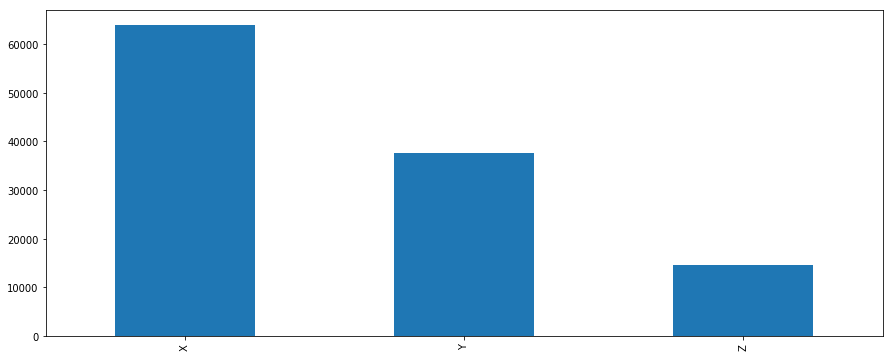

In [37]:
train.source.value_counts().plot.bar()

In [12]:
train.source = le_source.fit_transform(train.source)

In [13]:
train.source.unique()

array([2, 1, 0])

In [24]:
train.loan_purpose.unique()

array(['C86', 'B12', 'A23'], dtype=object)

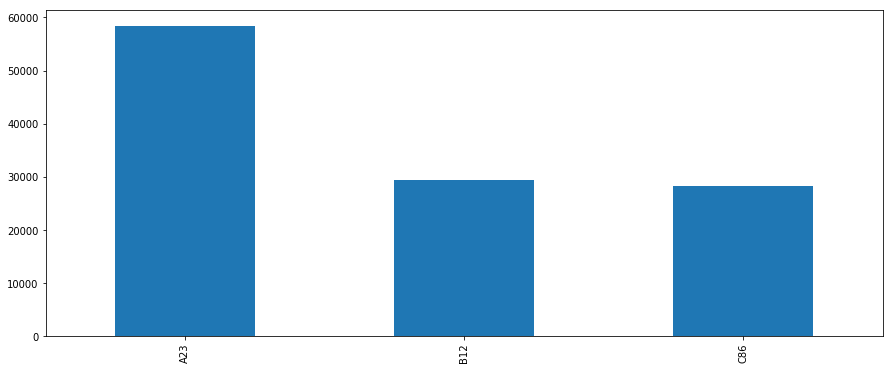

In [47]:
train.loan_purpose.value_counts().plot.bar()

In [13]:
train.loan_purpose = le_loanpurpose.fit_transform(train.loan_purpose)

In [14]:
train.loan_purpose.unique()

array([2, 1, 0])

In [27]:
train.dtypes

loan_id                              int64
source                               int64
financial_institution                int64
interest_rate                      float64
unpaid_principal_bal                 int64
loan_term                            int64
origination_date            datetime64[ns]
first_payment_date          datetime64[ns]
loan_to_value                        int64
number_of_borrowers                float64
debt_to_income_ratio               float64
borrower_credit_score              float64
loan_purpose                         int64
insurance_percent                  float64
co-borrower_credit_score           float64
insurance_type                     float64
m1                                   int64
m2                                   int64
m3                                   int64
m4                                   int64
m5                                   int64
m6                                   int64
m7                                   int64
m8         

## Correlation between features

### Cat-Cat

In [28]:
#Contingency tables
#tally of counts between two or more categorical variables.
data_crosstab = pd.crosstab(train.financial_institution, 
                            train.source,
                               margins = False) 

In [29]:
data_crosstab

source,0,1,2
financial_institution,,,
0,261,197,25
1,11213,17741,2898
2,388,0,0
3,344,951,347
4,123,3381,1353
5,2954,1719,42
6,2530,65,563
7,577,903,636
8,38662,5989,5048


In [16]:
import scipy.stats as ss
from collections import Counter
import math

Similarly to correlation, the output is in the range of [0,1], where 0 means no association and 1 is full association. (Unlike correlation, there are no negative values, as there’s no such thing as a negative association. Either there is, or there isn’t)

In [17]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [18]:
cramers = cramers_v(train.financial_institution,train.source)

In [19]:
cramers

0.4623130239516966

#### There's another method to check correlations between categorical features which is Theils_U
>Just like Cramer’s V, the output value is on the range of [0,1], with the same interpretations as before — but unlike Cramer’s V, it is asymmetric, meaning U(x,y)≠U(y,x) (while V(x,y)=V(y,x), where V is Cramer’s V). Using Theil’s U in the simple case above will let us find out that knowing y means we know x, but not vice-versa.

In [20]:
def conditional_entropy(x, y):
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

In [21]:
def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [22]:
categorical_features = ['financial_institution','source','loan_purpose','insurance_type']

In [156]:
tmp = train[categorical_features]

In [162]:
corr_categorical = tmp.corr(method=cramers_v)

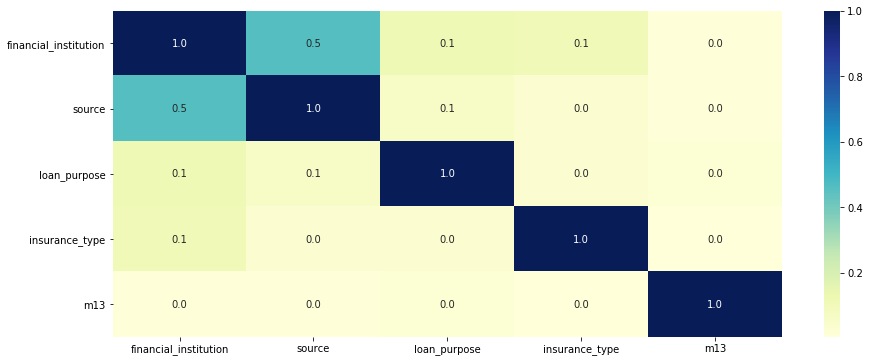

In [163]:
sns.heatmap(corr_categorical,annot=True,fmt=".1f",cmap="YlGnBu")

>By looking at the above heatmap we can infer that there isn't a significant correlation coefficient that tells us something worth noting so we have to try something else

 Correlation Ratio (often marked using the greek letter eta). Mathematically, it is defined as the weighted variance of the mean of each category divided by the variance of all samples; in human language, the Correlation Ratio answers the following question: Given a continuous number, how well can you know to which category it belongs to? Just like the two coefficients we’ve seen before, here too the output is on the range of [0,1].

### correlation between continuous features
> Spearman technique is used here since it computes on ranks and so depicts monotonic relationships

In [206]:
continous_features = train.drop(categorical_features,axis=1)

In [207]:
corr_cont = continous_features.corr(method='spearman')

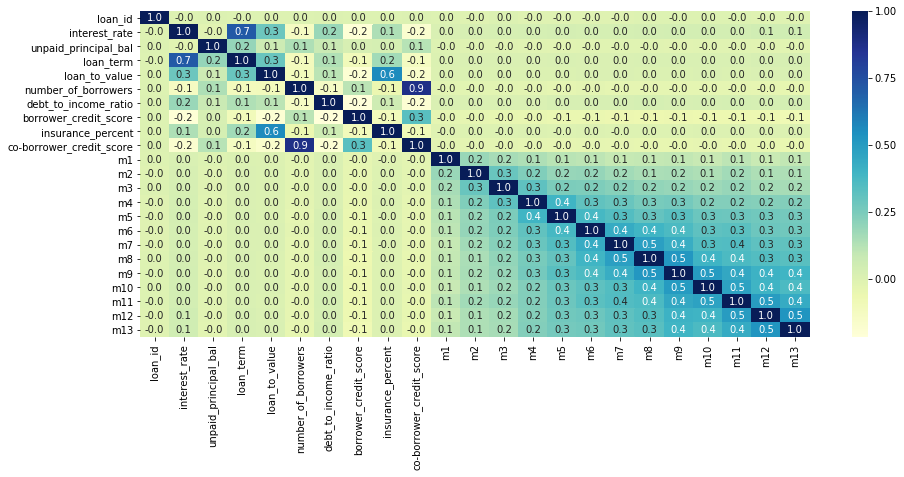

In [208]:
sns.heatmap(corr_cont,annot=True,fmt=".1f",cmap="YlGnBu")

In [ ]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

## Anaylsis

In [23]:
m = ['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12']

In [24]:
for i in m:
    print(i+':',train['%s'%i].unique())

m1: [0 1 2 3]
m2: [0 1 2 3 4]
m3: [0 2 1 3 4 5]
m4: [0 3 1 2 4 5 6]
m5: [0 4 1 3 2 5 6 7]
m6: [0 5 1 2 4 3 6 7 8]
m7: [1 0 6 3 5 2 4 7 8 9]
m8: [ 0  7  1  4  6  2  5  3  9 10]
m9: [ 0  1  8  5  7  3  6  2 10  4 11]
m10: [ 0  1  9  2  6  8  4  3  7 11  5 12]
m11: [ 0  1 10  2  7  9  5  3  8  4  6 11 13]
m12: [ 0  1 11  2  8  3 10  6  9  5  4  7 14]


In [25]:
train[['origination_date','first_payment_date','m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12','m13']]

,origination_date,first_payment_date,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,2012-03-01,2012-05-01,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2012-01-01,2012-03-01,0,0,0,0,0,0,0,0,0,0,1,0,1
2,2012-01-01,2012-03-01,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2012-02-01,2012-04-01,0,0,0,0,0,0,0,0,1,1,1,1,1
4,2012-02-01,2012-04-01,0,1,2,3,4,5,6,7,8,9,10,11,1
5,2012-02-01,2012-04-01,1,0,0,0,0,0,0,0,0,0,0,0,1
6,2012-02-01,2012-04-01,0,0,0,0,0,0,0,0,0,0,0,0,1
7,2012-01-01,2012-03-01,0,1,0,0,0,0,0,0,0,0,0,0,1
8,2012-03-01,2012-05-01,0,0,0,0,1,0,1,0,1,2,0,1,1
9,2012-01-01,2012-03-01,0,0,0,0,0,1,1,1,1,1,2,2,1


In [26]:
train[(train.m13>0) & ((train.m1==0) &
                       (train.m2==0) &
                       (train.m3==0) &
                       (train.m4==0) &
                       (train.m5==0) &
                       (train.m6==0) &
                       (train.m7==0) &
                       (train.m8==0) &
                       (train.m9==0) &
                       (train.m10==0) &
                       (train.m11==0) &
                       (train.m12==0))][['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12','m13']]

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
2,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,1
12,0,0,0,0,0,0,0,0,0,0,0,0,1
14,0,0,0,0,0,0,0,0,0,0,0,0,1
17,0,0,0,0,0,0,0,0,0,0,0,0,1
27,0,0,0,0,0,0,0,0,0,0,0,0,1
29,0,0,0,0,0,0,0,0,0,0,0,0,1
37,0,0,0,0,0,0,0,0,0,0,0,0,1
42,0,0,0,0,0,0,0,0,0,0,0,0,1
44,0,0,0,0,0,0,0,0,0,0,0,0,1


In [27]:
train[['origination_date','first_payment_date']]

,origination_date,first_payment_date
0,2012-03-01,2012-05-01
1,2012-01-01,2012-03-01
2,2012-01-01,2012-03-01
3,2012-02-01,2012-04-01
4,2012-02-01,2012-04-01
5,2012-02-01,2012-04-01
6,2012-02-01,2012-04-01
7,2012-01-01,2012-03-01
8,2012-03-01,2012-05-01
9,2012-01-01,2012-03-01


In [15]:
(train.first_payment_date-train.origination_date).value_counts()

60 days    95883
61 days    13441
91 days     2168
31 days     1714
90 days     1573
29 days     1279
dtype: int64

In [16]:
train['origination_first_payment'] = train.first_payment_date-train.origination_date

In [17]:
train.origination_first_payment = (train.origination_first_payment / np.timedelta64(1, 'D')).astype(int)

In [18]:
train.drop(['first_payment_date','origination_date'],axis=1,inplace=True)

In [19]:
train.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'loan_purpose', 'insurance_percent', 'co-borrower_credit_score',
       'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       'm10', 'm11', 'm12', 'm13', 'origination_first_payment'],
      dtype='object')

### Analysing 'loan_term','interest_rate','loan_to_value','insurance_percent'

In [32]:
train[['loan_term','interest_rate','loan_to_value','insurance_percent','financial_institution','source']]

,loan_term,interest_rate,loan_to_value,insurance_percent,financial_institution,source
0,360,4.250,95,30.0,18,2
1,360,4.875,72,0.0,15,1
2,180,3.250,49,0.0,17,2
3,360,4.750,46,0.0,8,0
4,360,4.750,80,0.0,8,0
5,360,4.375,80,0.0,1,1
6,360,4.000,95,30.0,8,0
7,300,4.500,62,0.0,1,1
8,360,4.000,76,0.0,1,0
9,360,4.000,95,30.0,8,0


In [20]:
train.to_csv('data/processed.csv',index=False)

In [241]:
train.dtypes

loan_id                        int64
source                         int64
financial_institution          int64
interest_rate                float64
unpaid_principal_bal           int64
loan_term                      int64
loan_to_value                  int64
number_of_borrowers          float64
debt_to_income_ratio         float64
borrower_credit_score        float64
loan_purpose                   int64
insurance_percent            float64
co-borrower_credit_score     float64
insurance_type               float64
m1                             int64
m2                             int64
m3                             int64
m4                             int64
m5                             int64
m6                             int64
m7                             int64
m8                             int64
m9                             int64
m10                            int64
m11                            int64
m12                            int64
m13                            int64
o

In [227]:
train.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'loan_purpose', 'insurance_percent', 'co-borrower_credit_score',
       'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       'm10', 'm11', 'm12', 'm13', 'origination_first_payment'],
      dtype='object')

# Model Building

<h5>This section focusses on Model building

>I have tried quite a range of models (xg,lg,rf) on different configurations and curating what works with this problem(will update soon)

- Based on some experience, to tackle this problem my primary approach is using: <h4>Focal Loss</h4>
- Focal loss weights were computed statictically for opt F1-score
- Started with XGBoostClassifier (without focal loss), in xgboost you can set focal loss by altering scale_pos_weight parameter which you can compute by
<h4>scale_pos_weight = 100 - ( (num_pos_samples /total_samples) * 100 )</h4>
- Moving further I hoped to RandomForest as open source data science community liked RF on skewed datasets.
- I combined GridSearchCV to find optimal params for XG and RF and used them in an ensemble way.
- Next up I used Multiple model prediction and Stacked them in column way and leveraging every prediction.
- Did some feature engineering using Recursive Feature Elimination using RF(which gave me the best f1-score on AV) to find out the most optimal subset of features.
- Finally my f1-score on public leaderboard went 0.336... and I finished 98/4000(approx) 

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
X = train.drop(['loan_id','m13'], axis=1)
feature_set = X.columns
X = X.values
y = train['m13']#.values

In [22]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [34]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
xg = xgb.XGBClassifier(n_estimators=200,importance_type='weight')

In [67]:
xg1 = xgb.XGBClassifier(
    learning_rate =0.007,
    n_estimators=1000,
    max_depth = 3,
    min_child_weight = 5,
    gamma=0.4,
    subsample=0.55,
    colsample_bytree=0.85,
    reg_alpha=0.005,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27
)

In [68]:
xg1.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.85, gamma=0.4, learning_rate=0.007,
       max_delta_step=0, max_depth=3, min_child_weight=5, missing=None,
       n_estimators=1000, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=0.005, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.55)

### Focal, Weighted loss xg

In [247]:
from sklearn.model_selection import GridSearchCV
from imxgboost.imbalance_xgb import imbalance_xgboost as imb_xgb
from sklearn.model_selection import StratifiedKFold

In [232]:
xgboster_focal = imb_xgb(num_round=100,max_depth =25,special_objective='focal')
#xgboster_weight = imb_xgb(special_objective='weighted')
CV_focal_booster = GridSearchCV(xgboster_focal, {"focal_gamma":[9]})
#CV_weight_booster = GridSearchCV(xgboster_weight, {"imbalance_alpha":[1.5,2.0,2.5,3.0,4.0]})

In [255]:
y.unique()

array([1, 0])

In [233]:
CV_focal_booster.fit(X, y)
#CV_weight_booster.fit(X, y)
opt_focal_booster = CV_focal_booster.best_estimator_
#opt_weight_booster = CV_weight_booster.best_estimator_

/media/aayush/New-Volume/A_property/kaggle/kaggle/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [234]:
CV_focal_booster.best_estimator_

imbalance_xgboost(booster='gbtree', eta=0.3, eval_metric='logloss',
         focal_gamma=9, imbalance_alpha=None, max_depth=25, num_round=100,
         objective_func='binary:logitraw', silent_mode=True,
         special_objective='focal')

In [235]:
class_output = opt_focal_booster.predict_determine(X_test, y=None) 

In [236]:
class_output

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [130]:
pred = xg1.predict(X_test)

In [248]:
len(train[train.m13==1])

636

In [202]:
from sklearn.metrics import f1_score

In [237]:
test_acc = f1_score(y_true=y_test,y_pred = class_output)
print('test f1:',train_acc)

# test_acc = opt_focal_booster.score(X_test,y_test)
# print('test accuracy:',test_acc)

test f1: 0.9973073691919954


In [238]:
tmp = pd.DataFrame({
    'test':y_test,
    'pred':class_output
})

In [239]:
len(tmp[tmp.test==tmp.pred])

23139

In [161]:
len(tmp)

23212

## Processing Test Data

In [22]:
test = pd.read_csv('data/test.csv')

In [24]:
test.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,Y,Browning-Hart,3.875,417000,360,01/02/12,Apr-12,75,1,...,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,01/02/12,Apr-12,80,2,...,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,01/01/12,Mar-12,75,1,...,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,01/02/12,Apr-12,41,2,...,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,01/02/12,Apr-12,53,2,...,0,0,0,0,0,0,0,0,0,0


In [23]:
test.financial_institution = le_financial.transform(test.financial_institution)

In [24]:
test.source = le_source.transform(test.source)

In [25]:
test.loan_purpose = le_loanpurpose.transform(test.loan_purpose)

In [35]:
test.origination_date = pd.to_datetime(test.origination_date,format='%d/%m/%y')

In [29]:
test.origination_date.iloc[0]

Timestamp('2012-02-01 00:00:00')

In [270]:
dt = datetime.datetime.strptime('Apr-12','%b-%y')

In [272]:
dt = pd.to_datetime(dt)

In [26]:
dt = []

In [27]:
import datetime

In [28]:
for i in range(len(test)):
    dt.append(pd.to_datetime(datetime.datetime.strptime(test.first_payment_date.iloc[i],'%b-%y')))

In [29]:
dt[:10]

[Timestamp('2012-04-01 00:00:00'),
 Timestamp('2012-04-01 00:00:00'),
 Timestamp('2012-03-01 00:00:00'),
 Timestamp('2012-04-01 00:00:00'),
 Timestamp('2012-04-01 00:00:00'),
 Timestamp('2012-04-01 00:00:00'),
 Timestamp('2012-04-01 00:00:00'),
 Timestamp('2012-03-01 00:00:00'),
 Timestamp('2012-04-01 00:00:00'),
 Timestamp('2012-04-01 00:00:00')]

In [30]:
test.drop('first_payment_date',axis=1,inplace=True)

In [33]:
test['first_payment_date'] = dt

In [36]:
test['origination_first_payment'] = test.first_payment_date-test.origination_date

In [37]:
test.origination_first_payment = (test.origination_first_payment / np.timedelta64(1, 'D')).astype(int)

In [38]:
test.drop(['first_payment_date','origination_date'],axis=1,inplace=True)

In [39]:
test.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'loan_purpose', 'insurance_percent', 'co-borrower_credit_score',
       'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       'm10', 'm11', 'm12', 'origination_first_payment'],
      dtype='object')

In [40]:
train.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'loan_purpose', 'insurance_percent', 'co-borrower_credit_score',
       'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       'm10', 'm11', 'm12', 'm13', 'origination_first_payment'],
      dtype='object')

In [627]:
X_sub = test.drop(['loan_id','insurance_percent','insurance_type','number_of_borrowers','m1','m2','m3','m4','m5','m6'], axis=1)
#feature_set = X.columns
#X_sub = X_sub.values

In [42]:
X_sub = sc.transform(X_sub)

In [241]:
pred_sub= opt_focal_booster.predict_determine(sc.transform(X_sub))

In [242]:
pred_sub

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [224]:
sub = pd.DataFrame({
    'loan_id':test.loan_id,
    'm13':pred_sub
})

In [243]:
sub.m13 = sub.m13.astype(int)

In [244]:
sub.head()

,loan_id,m13
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [245]:
sub.to_csv('sub11.csv',index=False)

### Random Forest

In [99]:
import numpy as np
import pandas as pd
import warnings

## Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

## Sklearn Libraries
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc, \
            classification_report, recall_score, precision_recall_curve

#from catboost import CatBoostClassifier
import xgboost as xgb


# Define random state
random_state = 2018
np.random.seed(random_state)
warnings.filterwarnings('ignore')

In [44]:
len(train[train.m13==1])/len(train)

0.005480018611383963

In [45]:
len(train[train.m13==0])/len(train)

0.9945199813886161

In [402]:
class Create_ensemble(object):
    def __init__(self, n_splits, base_models):
        self.n_splits = n_splits
        self.base_models = base_models

    def predict(self, X, y, T):
        X = np.array(X)
        y = np.array(y)
        T = np.array(T)
        no_class = len(np.unique(y))

        folds = list(StratifiedKFold(n_splits=self.n_splits, shuffle=True, 
                                     random_state = random_state).split(X, y))

        train_proba = np.zeros((X.shape[0], no_class))
        test_proba = np.zeros((T.shape[0], no_class))
        
        train_pred = np.zeros((X.shape[0], len(self.base_models)))
        test_pred = np.zeros((T.shape[0], len(self.base_models)* self.n_splits))
        f1_scores = np.zeros((len(self.base_models), self.n_splits))
        recall_scores = np.zeros((len(self.base_models), self.n_splits))
        
        test_col = 0
        for i, clf in enumerate(self.base_models):
            
            for j, (train_idx, valid_idx) in enumerate(folds):
                
                X_train = X[train_idx]
                Y_train = y[train_idx]
                X_valid = X[valid_idx]
                Y_valid = y[valid_idx]
                
                clf.fit(X_train, Y_train)
                
                valid_pred = clf.predict(X_valid)
                recall  = recall_score(Y_valid, valid_pred, average='macro')
                f1 = f1_score(Y_valid, valid_pred, average='macro')
                
                recall_scores[i][j] = recall
                f1_scores[i][j] = f1
                
                train_pred[valid_idx, i] = valid_pred
                test_pred[:, test_col] = clf.predict(T)
                test_col += 1
                
                ## Probabilities
                valid_proba = clf.predict_proba(X_valid)
                train_proba[valid_idx, :] = valid_proba
                test_proba  += clf.predict_proba(T)
                
                print( "Model- {} and CV- {} recall: {}, f1_score: {}".format(i, j, recall, f1))
                
            test_proba /= self.n_splits
            
        return train_proba, test_proba, train_pred, test_pred

In [621]:
class_weight = dict({0:1.6, 1:180})
class_weight_cat = [0.005480018611383963,0.9945199813886161]
xtrain = train.drop(['loan_id','m13','insurance_percent','insurance_type','number_of_borrowers','m1','m2','m3','m4','m5','m6'], axis=1)
ytrain = train['m13'].values

In [332]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = random_state)

rdf = RandomForestClassifier(random_state = random_state,class_weight=class_weight) 
scoring = {'Recall': make_scorer(recall_score),
           'f1_score': make_scorer(f1_score)
          }

params = {'max_depth': [15, 20,25], 
              #'min_samples_split': [5, 10, 15],
              #'min_samples_leaf' : [4, 8, 12],
              'n_estimators' : [500, 600, 700]
             }

grid_clf = GridSearchCV(estimator = rdf, param_grid = params, cv = cv, n_jobs=-1, verbose=4)
grid_clf.fit(xtrain, ytrain)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed: 19.8min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 20.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2018, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 1.9, 1: 180},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=2018, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [15, 20, 25], 'n_estimators': [500, 600, 700]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [333]:
print(grid_clf.best_estimator_)
print(grid_clf.best_params_)

RandomForestClassifier(bootstrap=True, class_weight={0: 1.9, 1: 180},
            criterion='gini', max_depth=25, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=None, oob_score=False,
            random_state=2018, verbose=0, warm_start=False)
{'max_depth': 25, 'n_estimators': 500}


In [402]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = random_state)

lg = lgb.LGBMClassifier(class_weight=class_weight)
scoring = {'Recall': make_scorer(recall_score),
           'f1_score': make_scorer(f1_score)
          }

params = {'num_leaves': [150,200,250], 
          'min_data_in_leaf':[25,35,45],
              'learning_rate': [0.1, 0.2, 0.5],
              'n_estimators' : [80, 100]
             }

grid_lg = GridSearchCV(estimator = lg, param_grid = params, cv = cv, n_jobs=-1, verbose=4)
grid_lg.fit(xtrain, ytrain)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  7.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2018, shuffle=True),
       error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight={0: 1.9, 1: 180},
        colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
        max_depth=-1, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'num_leaves': [150, 200, 250], 'min_data_in_leaf': [25, 35, 45], 'learning_rate': [0.1, 0.2, 0.5], 'n_estimators': [80, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [403]:
print(grid_lg.best_estimator_)
print(grid_lg.best_params_)

LGBMClassifier(boosting_type='gbdt', class_weight={0: 1.9, 1: 180},
        colsample_bytree=1.0, importance_type='split', learning_rate=0.2,
        max_depth=-1, min_child_samples=20, min_child_weight=0.001,
        min_data_in_leaf=45, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=250, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)
{'learning_rate': 0.2, 'min_data_in_leaf': 45, 'n_estimators': 100, 'num_leaves': 250}


In [100]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = random_state)

et = ExtraTreesClassifier(class_weight=class_weight)
scoring = {'Recall': make_scorer(recall_score),
           'f1_score': make_scorer(f1_score)
          }

params = {#'max_depth': [15, 20,25], 
              'min_samples_split': [5, 10, 15],
              #'min_samples_leaf' : [4, 8, 12],
              'n_estimators' : [80, 100, 150]
             }

grid_et = GridSearchCV(estimator = et, param_grid = params, cv = cv, n_jobs=-1, verbose=4)
grid_et.fit(xtrain, ytrain)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:  7.6min remaining:   32.6s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  7.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2018, shuffle=True),
       error_score='raise-deprecating',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight={0: 1.9, 1: 180},
           criterion='gini', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators='warn', n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': [5, 10, 15], 'n_estimators': [80, 100, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [101]:
print(grid_et.best_estimator_)
print(grid_et.best_params_)

ExtraTreesClassifier(bootstrap=False, class_weight={0: 1.9, 1: 180},
           criterion='gini', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)
{'min_samples_split': 5, 'n_estimators': 100}


In [413]:
rdf = RandomForestClassifier(bootstrap=True, class_weight=class_weight, criterion='gini',
            max_depth=55, max_features='auto', max_leaf_nodes=1000,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False,
            random_state=random_state,
            verbose=0, warm_start=False)

In [55]:
num_pos_samples = len(train[train.m13==1])
total_samples = len(train)

In [56]:
num_pos_samples,total_samples

(636, 116058)

In [57]:
scale_pos_weight = 100 - ( (num_pos_samples /total_samples) * 100 )

In [58]:
scale_pos_weight

99.4519981388616

In [155]:
xg = xgb.XGBClassifier(
                        learning_rate =0.1,
                        n_estimators=80,
                        max_depth = 40,
                        min_child_weight = 5,
                        gamma=0.4,
                        subsample=0.55,
                        #colsample_bytree=0.85,
                        objective= 'binary:logistic',
                        nthread=4,
                        reg_lambda=1,
                        scale_pos_weight=scale_pos_weight
                    )

In [156]:
lg = lgb.LGBMClassifier(boosting_type='gbdt', class_weight={0: 1.9, 1: 180},
                        colsample_bytree=1.0, importance_type='split', learning_rate=0.2,
                        max_depth=-1, min_child_samples=20, min_child_weight=0.001,
                        min_data_in_leaf=45, min_split_gain=0.0, n_estimators=100,
                        n_jobs=-1, num_leaves=250, objective=None, random_state=None,
                        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
                        subsample_for_bin=200000, subsample_freq=0)

In [110]:
et = ExtraTreesClassifier(bootstrap=False, class_weight={0: 1.9, 1: 190},
           criterion='gini', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [414]:
base_models = [rdf
              #,xg
              ]
n_splits = 5
lgb_stack = Create_ensemble(n_splits = n_splits, base_models = base_models)        

# ytrain = label_binarize(Y, classes=[0, 1, 2])

In [415]:
train_proba, test_proba, train_pred, test_pred = lgb_stack.predict(xtrain, ytrain, X_sub)

Model- 0 and CV- 0 recall: 0.6676005455382283, f1_score: 0.727620415371717
Model- 0 and CV- 1 recall: 0.6887381280069036, f1_score: 0.7570912906435009
Model- 0 and CV- 2 recall: 0.6885864975160898, f1_score: 0.7476555382043235
Model- 0 and CV- 3 recall: 0.6767321538455241, f1_score: 0.7332718202465931
Model- 0 and CV- 4 recall: 0.7201475405809935, f1_score: 0.7818980301456937


In [113]:
print('1. The F-1 score of the model {}\n'.format(f1_score(ytrain, train_pred, average='macro')))
print('2. The recall score of the model {}\n'.format(recall_score(ytrain, train_pred, average='macro')))
print('3. Classification report \n {} \n'.format(classification_report(ytrain, train_pred)))
print('4. Confusion matrix \n {} \n'.format(confusion_matrix(ytrain, train_pred)))

1. The F-1 score of the model 0.753502072778959

2. The recall score of the model 0.7479532449096555

3. Classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    115422
           1       0.52      0.50      0.51       636

   micro avg       0.99      0.99      0.99    116058
   macro avg       0.76      0.75      0.75    116058
weighted avg       0.99      0.99      0.99    116058
 

4. Confusion matrix 
 [[115131    291]
 [   319    317]] 



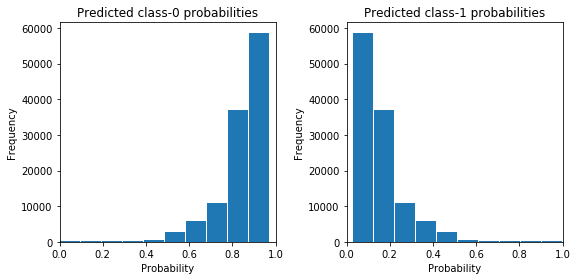

In [271]:
# histogram of predicted probabilities
plt.figure(figsize=(12, 4))
nclasses = 2
for i in range(nclasses):
    
    plt.subplot(1, 3, i+1)
    plt.hist(train_proba[:, i], bins=10, histtype='bar', rwidth=0.95)
    plt.xlim(0,1)
    plt.title('Predicted class-{} probabilities'.format(i))
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Stacking xgb and rf

In [48]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
import lightgbm as lgb

In [574]:
models = [
    RandomForestClassifier(bootstrap=True, class_weight=class_weight, criterion='entropy',
            max_depth=65, max_features='auto', max_leaf_nodes=1000,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=True,
            random_state=random_state,
            verbose=0, warm_start=True),
    
    xgb.XGBClassifier(
                        learning_rate =0.15,
                        n_estimators=500,
                        max_depth = 65,
                        min_child_weight = 5,
                        gamma=0.4,
                        subsample=0.55,
                        #colsample_bytree=0.85,
                        objective= 'binary:logistic',
                        nthread=4,
                        reg_lambda=1,
                        scale_pos_weight=scale_pos_weight
                    )
    ,
    lgb.LGBMClassifier(boosting_type='gbdt', class_weight={0: 1.9, 1: 180},
                        colsample_bytree=1.0, importance_type='split', learning_rate=0.2,
                        max_depth=65, min_child_samples=20, min_child_weight=0.001,
                        min_data_in_leaf=45, min_split_gain=0.0, n_estimators=100,
                        n_jobs=-1, num_leaves=250, objective=None, random_state=None,
                        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
                        subsample_for_bin=200000, subsample_freq=0)
    ,
    ExtraTreesClassifier(bootstrap=False, class_weight={0: 1.9, 1: 190},
           criterion='gini', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)
]

In [575]:
class Create_ensemble(object):
    def __init__(self, n_splits, base_models):
        self.n_splits = n_splits
        self.base_models = base_models

    def predict(self, X, y, T):
        X = np.array(X)
        y = np.array(y)
        T = np.array(T)
        no_class = len(np.unique(y))

        folds = list(StratifiedKFold(n_splits=self.n_splits, shuffle=True, 
                                     random_state = random_state).split(X, y))

        train_proba = np.zeros((X.shape[0], no_class))
        test_proba = np.zeros((T.shape[0], no_class))
        
        train_pred = np.zeros((X.shape[0], len(self.base_models)))
        test_pred = np.zeros((T.shape[0], len(self.base_models)* self.n_splits))
        f1_scores = np.zeros((len(self.base_models), self.n_splits))
        recall_scores = np.zeros((len(self.base_models), self.n_splits))
        
        test_col = 0
        for i, clf in enumerate(self.base_models):
            
            for j, (train_idx, valid_idx) in enumerate(folds):
                
                X_train = X[train_idx]
                Y_train = y[train_idx]
                X_valid = X[valid_idx]
                Y_valid = y[valid_idx]
                
                clf.fit(X_train, Y_train)
                
                valid_pred = clf.predict(X_valid)
                recall  = recall_score(Y_valid, valid_pred, average='macro')
                f1 = f1_score(Y_valid, valid_pred, average='macro')
                
                recall_scores[i][j] = recall
                f1_scores[i][j] = f1
                
                train_pred[valid_idx, i] = valid_pred
                test_pred[:, test_col] = clf.predict(T)
                test_col += 1
                
#                 ## Probabilities
#                 valid_proba = clf.predict_proba(X_valid)
#                 train_proba[valid_idx, :] = valid_proba
#                 test_proba  += clf.predict_proba(T)
                
                print( "Model- {} and CV- {} recall: {}, f1_score: {}".format(i, j, recall, f1))
                
            #test_proba /= self.n_splits
            
        return train_pred, test_pred

In [576]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.round(np.mean(predictions, axis=1)) 

In [577]:
averaged_models = AveragingModels(models = (models[0], models[1]))

In [578]:
base_models = [averaged_models
              #stacked_averaged_models
              ]
n_splits = 5
lgb_stack = Create_ensemble(n_splits = n_splits, base_models = base_models)    

In [579]:
train_pred, test_pred = lgb_stack.predict(xtrain, ytrain, X_sub)

Model- 0 and CV- 0 recall: 0.7025618637643491, f1_score: 0.7513237660324409
Model- 0 and CV- 1 recall: 0.7000726517372463, f1_score: 0.7405268393015938
Model- 0 and CV- 2 recall: 0.727826616110692, f1_score: 0.7765057513487836
Model- 0 and CV- 3 recall: 0.7119053044205552, f1_score: 0.7523849844506239
Model- 0 and CV- 4 recall: 0.7357006318587235, f1_score: 0.7833755755205285


In [580]:
print('1. The F-1 score of the model {}\n'.format(f1_score(ytrain, train_pred, average='macro')))
print('2. The recall score of the model {}\n'.format(recall_score(ytrain, train_pred, average='macro')))
print('3. Classification report \n {} \n'.format(classification_report(ytrain, train_pred)))
print('4. Confusion matrix \n {} \n'.format(confusion_matrix(ytrain, train_pred)))

1. The F-1 score of the model 0.7608228199487839

2. The recall score of the model 0.7155928303129158

3. Classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    115422
           1       0.66      0.43      0.52       636

   micro avg       1.00      1.00      1.00    116058
   macro avg       0.83      0.72      0.76    116058
weighted avg       1.00      1.00      1.00    116058
 

4. Confusion matrix 
 [[115283    139]
 [   361    275]] 



In [156]:
train.drop(['loan_id','m13'],axis=1).columns,test.drop(['loan_id'],axis=1).columns

(Index(['source', 'financial_institution', 'interest_rate',
        'unpaid_principal_bal', 'loan_term', 'loan_to_value',
        'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
        'loan_purpose', 'insurance_percent', 'co-borrower_credit_score',
        'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
        'm10', 'm11', 'm12', 'origination_first_payment'],
       dtype='object'),
 Index(['source', 'financial_institution', 'interest_rate',
        'unpaid_principal_bal', 'loan_term', 'loan_to_value',
        'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
        'loan_purpose', 'insurance_percent', 'co-borrower_credit_score',
        'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
        'm10', 'm11', 'm12', 'origination_first_payment'],
       dtype='object'))

In [499]:
test_pred[:,4]

array([0., 0., 0., ..., 0., 0., 0.])

## Custom class

In [510]:
class custom(object):
    def __init__(self,base_models):
        self.base_models = base_models

    def predict(self, X, y, T):
        X = np.array(X)
        y = np.array(y)
        T = np.array(T)
        no_class = len(np.unique(y))

        train_proba = []
        test_proba = []
        valid_proba=[]
        
        train_pred = []
        test_pred = []
        f1_scores = []
        recall_scores = []
        
        test_col = 0
        for i, clf in enumerate(self.base_models):
                
            X_train = X
            Y_train = y

            clf.fit(X_train, Y_train)

            valid_pred = clf.predict(X_train)
            recall  = recall_score(Y_train, valid_pred, average='macro')
            f1 = f1_score(Y_train, valid_pred, average='macro')

            recall_scores.append(recall)
            f1_scores.append(f1)

            train_pred.append(valid_pred)
            test_pred.append(clf.predict(T))

            ## Probabilities
            valid_proba.append(clf.predict_proba(X_train))
            train_proba.append(valid_proba)
            test_proba.append(clf.predict_proba(T))

            print( "Model- {}- recall: {}, f1_score: {}".format(i,recall, f1))
            
        return train_proba, test_proba, train_pred, test_pred

In [279]:
base_models=[RandomForestClassifier(bootstrap=True, class_weight=class_weight, criterion='gini',
            max_depth=45, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False,
            random_state=random_state,
            verbose=0, warm_start=False),
    
    xgb.XGBClassifier(
                        learning_rate =0.1,
                        n_estimators=100,
                        max_depth = 40,
                        min_child_weight = 5,
                        gamma=0.4,
                        subsample=0.55,
                        #colsample_bytree=0.85,
                        objective= 'binary:logistic',
                        nthread=4,
                        reg_lambda=1,
                        scale_pos_weight=scale_pos_weight
                    )
    ,
    lgb.LGBMClassifier(boosting_type='gbdt', class_weight={0: 1.9, 1: 5.977},
                        colsample_bytree=1.0, importance_type='split', learning_rate=0.2,
                        max_depth=90, min_child_samples=25, min_child_weight=0.001,
                        min_data_in_leaf=23, min_split_gain=0.0, n_estimators=100,
                        n_jobs=-1, num_leaves=250, objective=None, random_state=None,
                        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
                        subsample_for_bin=200000, subsample_freq=0)]

In [623]:
custom_class = custom(base_models=[RandomForestClassifier(bootstrap=True, class_weight=class_weight, 
                                                          criterion='entropy',
            max_depth=65, max_features='auto', max_leaf_nodes=1000,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=True,
            random_state=random_state,
            verbose=0, warm_start=False)])

In [628]:
train_proba, test_proba, train_pred, test_pred = custom_class.predict(xtrain, ytrain, X_sub)

Model- 0- recall: 0.9992505761466618, f1_score: 0.9397634153491636


In [550]:
test_proba[0][-3]

array([0.63821818, 0.36178182])

In [552]:
test_pred[0][-3]

0

In [450]:
from sklearn.feature_selection import RFE

In [600]:
clf = RandomForestClassifier(bootstrap=True, class_weight=class_weight, criterion='entropy',
            max_depth=65, max_features='auto', max_leaf_nodes=1000,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=True,
            random_state=random_state,
            verbose=0, warm_start=False)

In [601]:
train.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'loan_purpose', 'insurance_percent', 'co-borrower_credit_score',
       'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       'm10', 'm11', 'm12', 'm13', 'origination_first_payment'],
      dtype='object')

## Feature Engg

In [614]:
rfe= RFE(clf, 17)
fit = rfe.fit(xtrain, ytrain)
print("Num Features:",fit.n_features_)
print("Selected Features:",fit.support_)
print("Feature Ranking:",fit.ranking_)

Num Features: 17
Selected Features: [ True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1]


In [616]:
pd.DataFrame({
    'features':train.drop(['loan_id','m13','insurance_percent','insurance_type','m1','m2','m3','m4','m5','m6'],axis=1),
    'importance':fit.support_
})

,features,importance
0,"(s, o, u, r, c, e)",True
1,"(f, i, n, a, n, c, i, a, l, _, i, n, s, t, i, ...",True
2,"(i, n, t, e, r, e, s, t, _, r, a, t, e)",True
3,"(u, n, p, a, i, d, _, p, r, i, n, c, i, p, a, ...",True
4,"(l, o, a, n, _, t, e, r, m)",True
5,"(l, o, a, n, _, t, o, _, v, a, l, u, e)",True
6,"(n, u, m, b, e, r, _, o, f, _, b, o, r, r, o, ...",False
7,"(d, e, b, t, _, t, o, _, i, n, c, o, m, e, _, ...",True
8,"(b, o, r, r, o, w, e, r, _, c, r, e, d, i, t, ...",True
9,"(l, o, a, n, _, p, u, r, p, o, s, e)",True


In [629]:
sub = pd.DataFrame({
    'loan_id':test.loan_id,
    'm13':test_pred[0]
})

In [630]:
sub.head()

,loan_id,m13
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [583]:
sub.m13 = sub.m13.astype(int)

In [631]:
sub.to_csv('sub56.csv',index=False)

## Vision
>I had some ideas to implement but unfortunately couldn't so I putting this in scope here:
1. By looking at the predictions it was evident that the classifier were able to predict some cases with high probability and some with close to 0.5,0.5. So by looking at those cases(the data) more depth about them can be learned.
2. Feature engineering wasn't implemented at full capacity so maybe using more SOTA techniques better features that contributes more to the depth can be implemented.